In [112]:
import pandas as pd
import numpy as np
from math import log
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
from spacy import displacy
from nltk.corpus import stopwords
import nltk
nltk.download('popular', halt_on_error=False)
from nltk.tag import StanfordNERTagger
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from kmeans import Kmeans
from nltk.stem import WordNetLemmatizer
from pca import PCA
from accuracy import confusion_matrix
from graphs import Plot
from frequencymatrix import freq_matrix
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt

#from nltk.tokenize import word_tokenize
#import pandas as pd
#import numpy as np
#from math import log
#from collections import Counter
#from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/prernamishra/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /Users/prernamishra/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /Users/prernamishra/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /Users/prernamishra/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /Users/prernamishra/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /Users/prernamishra/nltk_data...
[nltk_data]    

In [58]:
 # path to all the files
file_path = open("/Users/prernamishra/Downloads/PredictiveAnalytics/assignment1/data.txt", "r")

combined_list = []
    # reading paths
for f in file_path:

        # removing space at the end
    path_string = f.rstrip("\n")

    with open(path_string, "r") as sub_files:
        text = ''
        for line in sub_files:
            text = text + line
            text = text.replace("\n", " ")
        combined_list.append(text)

#print(type(combined_list))

print(combined_list)
file_path.close()


['Aviation Authorities Ground Airline Over Safety Concerns  In an unprecedented move in local commercial aviation  history, the government decided to suspend the operations of a Colombian airline  because it believes that the airline does not meet aviation standards and  guarantee safety.  In fact, the Civil Aeronautics Administrative Directorate  notified AeroRepublica  airlines (currently ranked third in the country) that starting today it cannot  fly any of the nine DC-9 jets that make up its fleet.  The jets will remain  grounded for at least two weeks while AeroRepublica  supplies Civil Aeronautics with the paperwork and documents containing records  of the jet engines bought from the Alitalia company about four years ago. According to Civil Aeronautics Director Abel Enrique Jimenez Neira, the  Colombian airline did not achieve the aviation "certification" already granted  to Avianca, Aces, and Tampa.  "As long as AeroRepublica is unable to meet the standards, it must wait and wil

In [59]:
word_lemma = WordNetLemmatizer()

porter = PorterStemmer()
#lancaster = LancasterStemmer()


processed_list = []
processed_lemma = []

for i in range(len(combined_list)):
    data = combined_list[i]
    text = ''
    text1 = ''
    data = data.lower()
    token_words = word_tokenize(data)
    for words in token_words:
        output1 = word_lemma.lemmatize(words)
        output = porter.stem(output1)
        text = text + " " + output1
        text1 = text1 + " " + output

        #output = porter.stem(data)
    processed_list.append(text1)
    processed_lemma.append(text)

    

In [60]:
#print(processed_list)
#print(processed_lemma)

In [61]:
pre = preprocess(processed_lemma)


   

    

 AVIATION AUTHORITY GROUND AIRLINE OVER SAFETY CONCERN IN AN UNPRECEDENTED MOVE IN LOCAL COMMERCIAL AVIATION HISTORY , THE GOVERNMENT DECIDED TO SUSPEND THE OPERATION OF A COLOMBIAN AIRLINE BECAUSE IT BELIEF THAT THE AIRLINE DOE NOT MEET AVIATION STANDARD AND GUARANTEE SAFETY . IN FACT , THE CIVIL AERONAUTICS ADMINISTRATIVE DIRECTORATE NOTIFIED AEROREPUBLICA AIRLINE ( CURRENTLY RANKED THIRD IN THE COUNTRY ) THAT STARTING TODAY IT CAN NOT FLY ANY OF THE NINE DC-9 JET THAT MAKE UP IT FLEET . THE JET WILL REMAIN GROUNDED FOR AT LEAST TWO WEEK WHILE AEROREPUBLICA SUPPLY CIVIL AERONAUTICS WITH THE PAPERWORK AND DOCUMENT CONTAINING RECORD OF THE JET ENGINE BOUGHT FROM THE ALITALIA COMPANY ABOUT FOUR YEAR AGO . ACCORDING TO CIVIL AERONAUTICS DIRECTOR ABEL ENRIQUE JIMENEZ NEIRA , THE COLOMBIAN AIRLINE DID NOT ACHIEVE THE AVIATION `` CERTIFICATION '' ALREADY GRANTED TO AVIANCA , ACE , AND TAMPA . `` A LONG A AEROREPUBLICA IS UNABLE TO MEET THE STANDARD , IT MUST WAIT AND WILL BE BARRED FROM FLY

 ROK 'S YONHAP : GOV'T TO ESTABLISH CIVIL AIRLINE SAFETY GUIDELINE THIS YEAR SEOUL , JAN. 11 ( YONHAP ) -- GUIDELINE FOR CIVIL AVIATION SAFETY WILL BE SET UP TO ASSURE COMMERCIAL AIRLINE SAFETY DURING THE 2002 WORLD CUP FINAL , THE MINISTRY OF CONSTRUCTION AND TRANSPORTATION SAID FRIDAY . THE MINISTRY SAID CONCERN OVER THE SEPT. 11 TERRORIST ATTACK IN THE UNITED STATE AND THE COUNTRY 'S HOSTING OF THE WORLD CUP AND ASIAN GAME THIS YEAR PROMPTED THE NEW GUIDELINE . THE SAFETY GUIDELINE WILL ASSIGN SAFETY RESPONSIBILITY TO CUSTOM , THE INCHEON INTERNATIONAL AIRPORT , INTELLIGENCE AUTHORITY AND POLICE , ALONG WITH PROCEDURE FOR SECURITY CHECK . THE GUIDELINE WILL ALSO INCLUDE PROVISION FOR COMMERCIAL AIRLINE TO UPGRADE THEIR SECURITY CHECK ABOARD THE AIRPLANE THROUGH SECURITY TEAM SET UP WITHIN THE AIRLINE HEADED BY AIRLINE EXECUTIVE . A MINISTRY TASK FORCE WILL SET UP THE SAFETY GUIDELINE IN EITHER MARCH OR APRIL .
ROK ORG
GOV'T TO ESTABLISH CIVIL AIRLINE SAFETY GUIDELINE ORG
JAN ORG
11 

 AIR CHINA TO INVEST MORE IN AIRLINE SAFETY BEIJING , JUNE 12 ( XINHUA ) -- AIR CHINA WILL INVEST 270 MILLION YUAN ( 32.5 MILLION U.S. DOLLAR ) TO ENSURE SAFETY , 120 MILLION YUAN ( 14.5 MILLION U.S. DOLLAR ) OF WHICH IS TO BE USED FOR ENGINE MAINTENANCE , SOURCE WITH THE COMPANY SAID HERE WEDNESDAY . THE COMPANY WILL INCREASE SAFETY EDUCATION AND TRAINING PROGRAM FOR PILOT , WHO WILL BE TESTED MORE OFTEN . AND MORE SPECIAL TRAINING WILL BE GIVEN TO PILOT IN FLIGHT SIMULATOR . AIR CHINA WILL PLACE PILOT INTO DIFFERENT ROUTE GROUP IN COMPLIANCE WITH THEIR ABILITY AND PILOT WILL BE EXPECTED TO MAKE DETAILED STUDY OF ROUTE AND AIRPORT BEFORE TAKE OFF . AND EXPERT WILL STUDY CAREFULLY COMPLICATED ROUTE , AIRPORT AND THE WEATHER . MEANWHILE , AIR CHINA HA PLEDGED TO COMPLETE EXAMINING 69 PLANE AND ALL ENGINE A SOON A POSSIBLE IN A BID TO ELIMINATE ANY HIDDEN SOURCE OF TROUBLE . SO FAR , MORE THAN 40 PLANE HAVE BEEN SURVEYED . AND SOPHISTICATED TECHNOLOGY WILL ALSO BE USED TO FURTHER ENHANCE

 EUROPEAN PARLIAMENT AGRICULTURE COMMISSION PRESIDENT ON HOOF AND MOUTH CRISIS STRASBOURG - `` WITHOUT WANTING TO CULTIVATE CYNICISM , IT IS NOT THE WORST EVIL THAT THE HOOF AND MOUTH DISEASE CRISIS HA OCCURRED AT THIS MOMENT : AFTER MAD COW DISEASE , IT WILL FORCE U TO CONSIDER AN IN-DEPTH REFORM OF THE COMMON AGRICULTURAL POLICY ( CAP ) , '' ACCORDING TO FRIEDRICH WILHELM GRAEFE ZU BARINGDORF , PRESIDENT OF THE AGRICULTURE AND RURAL DEVELOPMENT COMMISSION OF THE EUROPEAN PARLIAMENT . GRAEFE ZU BARINGDORF SAID BLUNTLY WHAT MANY PEOPLE IN EUROPE ARE THINKING AT THE MOMENT : THAT THE HOOF AND MOUTH DISEASE EPIZOOTIC HA GIVEN THE COUP DE GRACE TO THE 1962-VERSION OF THE CAP ( 1962 WA THE YEAR THE CAP WA ESTABLISHED ) . PRIMACY OF THE MARKET FOR THIS GERMAN GREEN AGED 58 , BOTH THE ORIGIN OF BSE ( BOVINE SPONGIFORM ENCEPHALOPATHY ) AND HOOF AND MOUTH DISEASE LIE IN THE PRODUCTIVISM OF THE CAP . `` IT IS THE EUROPEAN INDUSTRIAL MODE OF PRODUCTION , WHICH IS AFFECTED , '' SAID GRAEFE ZU BAR

 FRANCE 'S GLAVANY CITED ON BSE , HOOF AND MOUTH MEASURE [ LE FIGARO ] ACCORDING TO THE LATEST AFSSA [ FRENCH FOOD HEALTH SAFETY AGENCY ] FINDING , NONE OF THE SUSPECTED AREA , APART FROM MAYENNE , HA PROVED TO HAVE BEEN CONTAMINATED BY HOOF AND MOUTH DISEASE . CAN WE CONSIDER FRANCE TO HAVE EXTRICATED ITSELF FROM THE CRISIS ? [ GLAVANY ] I WISH THIS WERE SO ! OUR CONFIDENCE INCREASE WITH EVERY PASSING DAY , BUT IT IS TO EARLY TO PROCLAIM VICTORY . THE PHENOMENON IS FAR FROM HAVING BEEN BROUGHT UNDER CONTROL IN THE UK : THE AUTHORITY ARE PURSUING IT INTENSIVELY . WITH SO MANY NEW OUTBREAK DAILY THERE -- THAT IS , ON OUR DOORSTEP -- THERE IS A GREAT RISK ; THE WIND OR THE THOUSAND OF TOURIST AND TRUCK CROSSING THE CHANNEL EVERY DAY COULD BRING THE VIRUS IN . [ LE FIGARO ] BUT HA THE BATTLE BEEN WON A REGARD THE RISK OF DIRECT CONTAMINATION BY SHEEP IMPORTED FROM THE UK BETWEEN 1 AND 21 FEBRUARY ? [ GLAVANY ] LET U SAY THAT IT IS ON THE WAY TO BEING SO . THIS IS WHY I HAVE ASKED EUROPE T

 CNA : PM ASKS FOR LOWER MORTGAGE RATE FOR QUAKE-AFFECTED VICTIM TAIPEI , DEC. 19 ( CNA ) -- PREMIER YU SHYI-KUN INSTRUCTED THE MINISTRY OF FINANCE THURSDAY TO COORDINATE DOMESTIC BANK WITHIN A WEEK TO ADJUST DOWNWARDS THE MORTGAGE RATE FOR VICTIM OF THE DISASTROUS EARTHQUAKE OF THREE YEAR AGO , WITH 4 PERCENT A THE GOAL . THE PREMIER ISSUED THE INSTRUCTION A THE 921 EARTHQUAKE POST-DISASTER RECOVERY COMMISSION MET FOR THE 20TH TIME SINCE THE KILLER TEMBLOR HIT TAIWAN SEPT. 21 , 1999 , WITH CENTRAL TAIWAN BEARING THE BRUNT OF THE CASUALTY AND DAMAGE . THE MINISTRY OF FINANCE INVITED THE COMMISSION , THE CENTRAL BANK OF CHINA , AND VARIOUS FINANCIAL INSTITUTION TO A MEETING OCT 22 , DURING WHICH THE PARTICIPANT AGREED TO CUT THE MORTGAGE LOAN RATE TO NOT HIGHER THAN 5 PERCENT . YU SAID THAT THE RATE MUST BE FURTHER CUT TO BELOW 4 PERCENT , ADDING THAT THE GOVERNMENT WILL SUBSIDIZE THE GAP OF 1 PERCENT IF THE LOAN RATE REMAINS AT 5 PERCENT . THE MEASURE WILL BE RETROACTIVE TO JANUARY THI

In [62]:
def remove_punctuation(text):
    symbols = "!#$%&()*+-./:;<=>?@[\]^_`{|}~\n"
    for j in range(len(text)):
        for i in range(len(symbols)):
            text[j] = text[j].replace(symbols[i], "")
            text[j] = text[j].replace('"', "")
        text[j] = text[j].replace(",", "")
    #print(text)
    return text



In [63]:
no_punc = remove_punctuation(processed_lemma)
print(type(no_punc))
    

<class 'list'>


In [64]:
for i in range(len(no_punc)):
        no_punc[i] = no_punc[i].replace("'", "")
        no_punc[i] = no_punc[i].replace(",", "")
        
print(no_punc)

    


[' aviation authority ground airline over safety concern in an unprecedented move in local commercial aviation history  the government decided to suspend the operation of a colombian airline because it belief that the airline doe not meet aviation standard and guarantee safety  in fact  the civil aeronautics administrative directorate notified aerorepublica airline  currently ranked third in the country  that starting today it can not fly any of the nine dc9 jet that make up it fleet  the jet will remain grounded for at least two week while aerorepublica supply civil aeronautics with the paperwork and document containing record of the jet engine bought from the alitalia company about four year ago  according to civil aeronautics director abel enrique jimenez neira  the colombian airline did not achieve the aviation  certification  already granted to avianca  ace  and tampa   a long a aerorepublica is unable to meet the standard  it must wait and will be barred from flying because of co

In [65]:
pre_process = processing(no_punc)

new_out = pre_process.remove_words()

['aviation authority ground airline safety concern unprecedented move local commercial aviation history government decided suspend operation colombian airline belief airline doe meet aviation standard guarantee safety fact civil aeronautics administrative directorate notified aerorepublica airline currently ranked third country starting today fly nine dc9 jet make fleet jet remain grounded least two week aerorepublica supply civil aeronautics paperwork document containing record jet engine bought alitalia company four year ago according civil aeronautics director abel enrique jimenez neira colombian airline achieve aviation certification already granted avianca ace tampa long aerorepublica unable meet standard must wait barred flying concern safety pas inspection jimenez neira said official noted key issue prompted drastic measure fact aerorepublica ha record jet airline ha possibility flying three nine jet depends result inspection civil aeronautics inspector planning make next four d

In [84]:
def n_grams(text, n):
    #print(text)
    output = {}
    final_out = {}
    tokens = []

    for i in range(len(text)):
        tokens.append(word_tokenize(text[i]))

    #print(tokens)

    for i in range(len(text)):
        new_text = word_tokenize(text[i])
        for j in range(len(new_text) - n + 1):
            g = " ".join(new_text[j:j + n])
            output.setdefault(g, 0)
            output[g] += 1
        #print(output)

        final_out.update(output)
    #print(final_out)
    #print(type(final_out))
    new_dict = {}

    for keys, value in final_out.items():
        if value >= 3:
            new_dict[keys] = value

    new_dict = sorted(new_dict.keys(), key=lambda output: output[1], reverse=True)
    #print(new_dict)

    final_pass = []

    for raw in tokens:
            j=0
            propass = []
            i = 0
            while i < (len(raw)):
                word = raw[i]
                if i + 1 < len(raw):
                    word2 = raw[i + 1]
                    check = word + " " + word2
                    #print(check)
                else:
                    check = word
                    #print(check)
                if check in new_dict:
                    propass.append(check)
                    i = i + 2
                else:
                    propass.append(word)
                    i = i + 1

            final_pass.append(propass)



    return new_dict, final_pass




In [179]:
ngrams, passing = n_grams(new_out, 2)
#print("The most frequent words after n-grams are :", ngrams)
#print(passing)


In [180]:
class preprocess():
    def __init__(self, text):
        # ner tagging
        NER = spacy.load("en_core_web_sm")

        # defining the lists
        names = []
        desig = []

        for i in text:
            new_text = i.upper()
            ner_tags = NER(new_text)
            print(ner_tags)
            for word in ner_tags.ents:
                names.append(word.text)
                desig.append(word.label_)

                print(word.text, word.label_)
        print(names)
        print(desig)

        updated = []
        for i in range(len(text)):
            tokens = word_tokenize(text[i])
            updated.append(tokens)

        i = 0

        thresh = (len(names)-1)
        passing_final = []

In [181]:

class processing():
    def __init__(self, text):
        # removing stop-words
        self.text = text

    def remove_words(self):
        stop_words = stopwords.words('english')

        # tokenize
        total_output = []
        for i in range(len(self.text)):
            words = word_tokenize(str(self.text[i]))
            output = [w for w in words if not w in stop_words]
            output = " ".join(output)
            total_output.append(output)

        print(total_output)
        print(type(total_output))

        return total_output



In [182]:


def freq_matrix(data, data_sub):
    word_set = {}


    
    for i in range(len(data)):
        word_set = set(data[i]).union(set(word_set))

    # print(word_set)
    word_array = []
    for i in range(len(data)):
        word_array.append(dict.fromkeys(word_set, 0))

    # print(word_array)

    for i in range(len(data)):
        
        for j in data[i]:
            word_array[i][j] += 1

    top_5 = []

    for i in word_array:
        # print(i)
        top_5_dict = {}

        top_5_dict = sorted(i.items(), key=lambda output: output[1], reverse=True)
        top_5.append(top_5_dict)

    final_5 = []
    for i in top_5:
        inbetween = []
        varia = 0
        for word in i:
            inbetween.append(word[0])
            varia = varia +1
            if varia > 5:
                break

        final_5.append(inbetween)

    #print(top_5)
    #print(final_5)

    text_dataframe = pd.DataFrame(final_5)

    #print(text_dataframe)

    file = open("frequntwords.txt", "w")
    file.close()

    text_dataframe.to_csv('frequntwords.txt', sep=' ')

    topic1 = final_5[:8]
    topic2 = final_5[8:16]
    topic3 = final_5[16:]


    counter1 = Counter(topic1[0])
    for i in topic1[1:]:
        counter1.update(i)

    #print(counter1.most_common())

    title1 = counter1.most_common()
    title1 = title1[0][0]

    print("Topic for first folder is", title1)

    counter2 = Counter(topic2[0])
    for i in topic2[1:]:
        counter2.update(i)

    title2 = counter2.most_common()
    title2 = title2[0][0]

    print("Topic for second folder is", title2)

    counter3 = Counter(topic3[0])
    for i in topic3[1:]:
        counter3.update(i)

    #print(counter3.most_common())
    title3 = counter3.most_common()
    title3 = title3[0][0]

    print("Topic for third folder is ", title3)


    # print(word_set)
    dataframe = pd.DataFrame(word_array)


    maximum_str = dataframe.idxmax(axis=1)

    
    #print(dataframe.idxmax(axis=1))

    # print(type(word_array[0]))
    # print(type(dataframe))
    # print(dataframe.columns)

    corpus_total_docs = 0
    tf_total_list = []

    idf = dict.fromkeys(word_set, 0)
    # counting tf
    for i in range(len(data)):

        total_words = len(data[i])
        corpus_total_docs = corpus_total_docs + 1
        tf_list = {}

        for words, counts in word_array[i].items():
            tf_list[words] = counts / total_words

            if counts > 0:
                idf[words] += 1

        tf_total_list.append(tf_list)

    tf_dataframe = pd.DataFrame(tf_total_list)
    # print(tf_dataframe)

    # print(idf)
    # print(corpus_total_docs)

    for words, counts in idf.items():
        idf[words] = log(corpus_total_docs / (float(counts)))

    # print(idf)

    # calculating tf-idf
    tf_idf = []

    for i in range(len(data)):
        tfidf_dict = dict.fromkeys(tf_total_list[i].keys(), 0)

        for words, counts in tf_total_list[i].items():
            tfidf_dict[words] = counts * idf[words]

        tf_idf.append(tfidf_dict)

    # print(tf_idf)

    tfidf_dataframe = pd.DataFrame(tf_idf)
    # print(tfidf_dataframe)


    tf_idf_sub = TfidfVectorizer()
    process_sub = tf_idf_sub.fit_transform(data_sub)

    process_sub = process_sub.toarray()
    #print(type(process_sub))
    #print(process_sub)

    return dataframe, tfidf_dataframe, process_sub



In [183]:
 matrix, tf_idf, sub_data = freq_matrix(passing, combined_list)

Topic for first folder is airline
Topic for second folder is disease
Topic for third folder is  bank


In [192]:
 kmean_cluster = Kmeans(k=3,  max_iter=100)

In [193]:
tf_idf_array = tf_idf.to_numpy()
fitted = kmean_cluster.fit_kmeans(tf_idf_array)

Running Model Iteration 0 
Model finished running


In [198]:
predicted = kmean_cluster.predict(tf_idf_array)
centers = kmean_cluster.centroids
#print(fitted)
print(predicted)



[2 2 2 0 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [106]:
class Kmeans:
    """ K Means Clustering

    Parameters
    -----------
        k: int , number of clusters

        seed: int, will be randomly set if None

        max_iter: int, number of iterations to run algorithm, default: 200"""


    def __init__(self, k, seed=None, value="euclid", max_iter=500):
        self.k = k
        self.seed = seed
        self.value = value
        if self.seed is not None:
            np.random.seed(self.seed)
        self.max_iter = max_iter

    def initialise_centroids(self, data):
        """Randomly Initialise Centroids

        Parameters
        ----------
        data: array or matrix, number_rows, number_features

        Returns
        --------
        centroids: array of k centroids chosen as random data points
        """

        #initial_centroids = np.random.permutation(data.shape[0])[:self.k]
        #print(initial_centroids)
        #print(type(initial_centroids))
        initial_centroids = [0,8,16]
        #print(initial_centroids)
        self.centroids = data[initial_centroids]

        return self.centroids

    def assign_clusters(self, data):
        """Compute distance of data from clusters and assign data point
           to closest cluster.
        Parameters
        ----------
        data: array or matrix, number_rows, number_features

        Returns
        --------
        cluster_labels: index which minmises the distance of data to each
        cluster

        """

        if data.ndim == 1:
            data = data.reshape(-1, 1)

        dist_to_centroid = pairwise_distances(data, self.centroids, metric='euclidean')
        if self.value == "cosine":
            new_distance = 1 - np.square(dist_to_centroid)
            self.cluster_labels = np.argmax(new_distance, axis=1)
        else:
            self.cluster_labels = np.argmin(dist_to_centroid, axis=1)

        return self.cluster_labels

    def update_centroids(self, data):
        """Computes average of all data points in cluster and
           assigns new centroids as average of data points

        Parameters
        -----------
        data: array or matrix, number_rows, number_features

        Returns
        -----------
        centroids: array, k, number_features
        """
        self.centroids = np.array([data[self.cluster_labels == i].mean(axis=0) for i in range(self.k)])

        return self.centroids

    def predict(self, data):
        """Predict which cluster data point belongs to
        Parameters
        ----------
        data: array or matrix, number_rows, number_features

        Returns
        --------
        cluster_labels: index which minmises the distance of data to each
        cluster
        """

        return self.assign_clusters(data)

    def fit_kmeans(self, data):
        """
        This function contains the main loop to fit the algorithm
        Implements initialise centroids and update_centroids
        according to max_iter
        -----------------------
        Returns
        -------
        instance of kmeans class
        """
        self.centroids = self.initialise_centroids(data)

        # Main kmeans loop
        for iter in range(self.max_iter):

            self.cluster_labels = self.assign_clusters(data)
            self.centroids = self.update_centroids(data)
            if iter % 100 == 0:
                print("Running Model Iteration %d " % iter)

        print("Model finished running")
        return self



In [201]:
class PCA:
    def __init__(self, matrix):
        self.matrix = matrix

    def calculate(self):
        features = self.matrix.T
        self.cov_matrix = np.cov(features)

        #using numpy to get eigenvector and values
        values, vectors = np.linalg.eig(self.cov_matrix)

        #importance of each feature
        max_num = (-values).argsort()[:3]
        max1 = max_num[0]
        max2 = max_num[1]

        #eigen vectors
        proj1 = self.matrix.dot(vectors.T[max1])
        proj2 = self.matrix.dot(vectors.T[max2])

        proj_data = pd.DataFrame(proj1, columns=['pc1'])
        proj_data['pc2'] = proj2

        print(proj_data)

        return proj_data

In [228]:
apply_pca = PCA(tf_idf_array)
out_pca = apply_pca.calculate()

                   pc1                 pc2
0  -0.010612+0.000000j  0.010773+0.000000j
1   0.000723+0.000000j  0.004952+0.000000j
2   0.010391+0.000000j  0.072044+0.000000j
3  -0.456475+0.000000j -0.037215+0.000000j
4   0.000689+0.000000j  0.017779+0.000000j
5  -0.000687+0.000000j  0.004610+0.000000j
6   0.017398+0.000000j  0.040546+0.000000j
7  -0.001805+0.000000j  0.010643+0.000000j
8   0.018766+0.000000j -0.023074+0.000000j
9   0.009799+0.000000j -0.003971+0.000000j
10  0.009293+0.000000j -0.001133+0.000000j
11  0.015546+0.000000j -0.002816+0.000000j
12  0.043897+0.000000j -0.371594+0.000000j
13  0.005308+0.000000j -0.001582+0.000000j
14  0.003863+0.000000j -0.002864+0.000000j
15  0.003584+0.000000j  0.000486+0.000000j
16  0.005528+0.000000j  0.006572+0.000000j
17  0.007506+0.000000j  0.006371+0.000000j
18  0.004848+0.000000j  0.006289+0.000000j
19  0.009697+0.000000j  0.011842+0.000000j
20  0.005355+0.000000j  0.007806+0.000000j
21  0.009228+0.000000j  0.010993+0.000000j
22  0.01127

In [227]:
confuse = confusion_matrix(predicted)
print_out = confuse.print()

Predicted  0  1  2
Actual            
0          1  0  7
1          0  1  7
2          0  0  8
Precision will be:  0.4166666666666667
Recall will be 0.4166666666666667
f1 score will be 0.4166666666666667


In [256]:
class Plotgraph():
    def __init__(self, pca, centers):
        self.pca = pca
        self.centers = centers

    def graph(self):
        x_axis = [o for o in self.pca.pc1]
        y_axis = [o for o in self.pca.pc2]
        plt.scatter(x_axis,y_axis)
        
        plt.show()
        


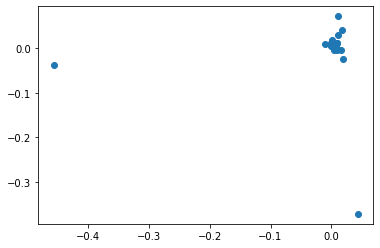

In [257]:
plotting = Plotgraph(out_pca, centers)

plotting.graph()